<a href="https://colab.research.google.com/github/VitikaJain25/PandasRevision/blob/master/ExploringPlotsToVisualizeRelationships.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
from google.colab import files  #To read file from local
import io
uploaded = files.upload()   # To upload file from local.

bikesharing_data = pd.read_csv(io.BytesIO(uploaded['bike_sharing_daily.csv']))

Saving bike_sharing_daily.csv to bike_sharing_daily.csv


In [4]:
bikesharing_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [0]:
bikesharing_data['dteday'] = pd.DatetimeIndex(bikesharing_data['dteday'])

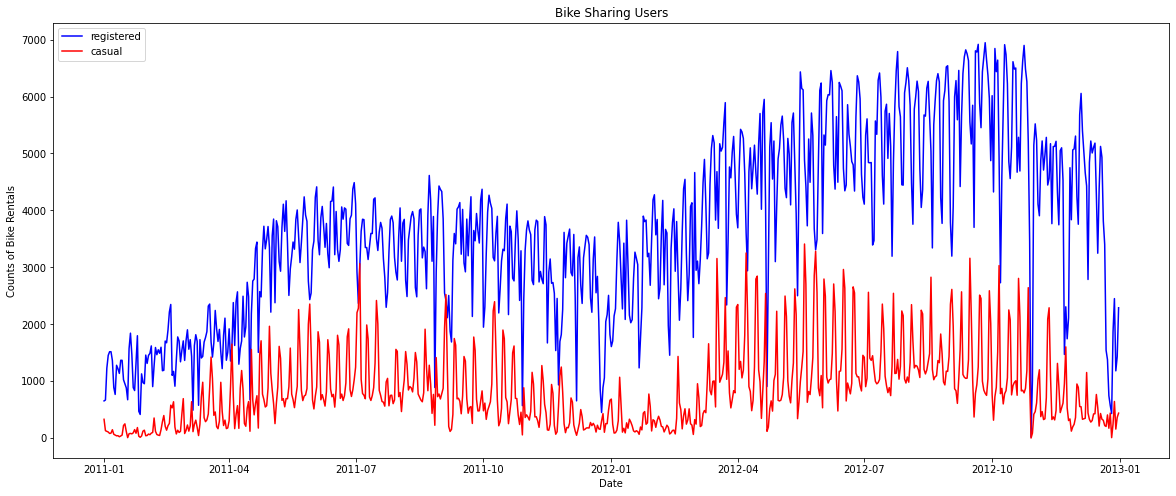

In [6]:
plt.figure(figsize = (20,8))

plt.plot(bikesharing_data['dteday'], bikesharing_data['registered'], color = 'b', label = 'registered')
plt.plot(bikesharing_data['dteday'], bikesharing_data['casual'], color = 'r', label = 'casual')

plt.legend(loc = 'upper left')
plt.title('Bike Sharing Users')
plt.xlabel('Date')
plt.ylabel('Counts of Bike Rentals')

plt.show()

In [8]:
# Counts of Bike share on yearly basis
year_df = bikesharing_data.groupby('yr', as_index = False).mean()
year_df[['yr', 'cnt']]

,yr,cnt
0,0,3405.761644
1,1,5599.934426


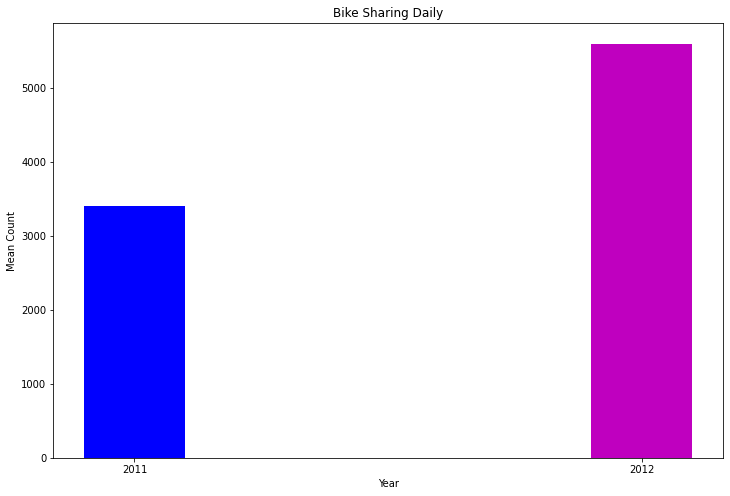

In [10]:
plt.figure(figsize = (12,8))

colors = ['b', 'm']

plt.bar(year_df['yr'], year_df['cnt'], color = colors, width = 0.2)

plt.xticks([0,1], ['2011', '2012'])

plt.title('Bike Sharing Daily')
plt.xlabel('Year')
plt.ylabel('Mean Count')

plt.show()

# More bikes were rented for 2012
# Bussiness seems to have improved

In [11]:
# Average number of Bikes rented on Working Days and Non Working days.
days = bikesharing_data.groupby('workingday', as_index = False).mean()
days[['cnt']]

,cnt
0,4330.168831
1,4584.820000


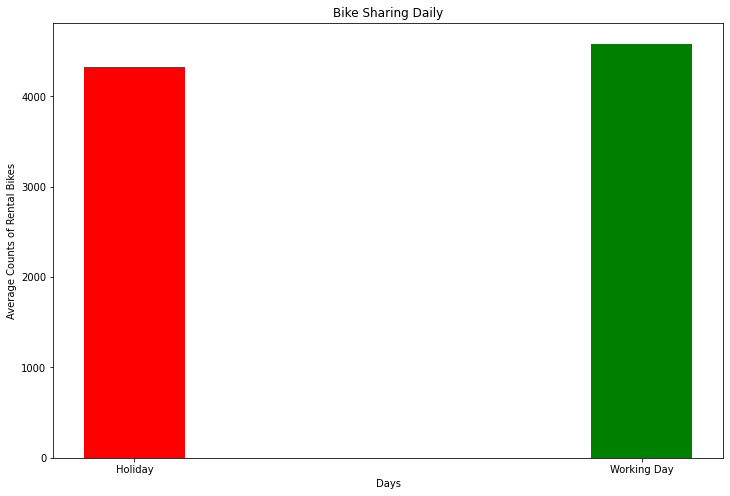

In [12]:
plt.figure(figsize = (12,8))

colors = ['r', 'g']

plt.bar(days['workingday'], days['cnt'], color = colors, width = 0.2)

plt.xticks([0,1], ['Holiday', 'Working Day'])

plt.title('Bike Sharing Daily')
plt.xlabel('Days')
plt.ylabel('Average Counts of Rental Bikes')

plt.show()
# Slightly more bikes are rented on Working Days

In [13]:
# Filtering out data for Year 1 (i.e year 2012)
year_data = bikesharing_data.loc[bikesharing_data['yr'] == 1]
year_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
365,366,2012-01-01,1,1,1,0,0,0,1,0.370000,0.375621,0.692500,0.192167,686,1608,2294
366,367,2012-01-02,1,1,1,1,1,0,1,0.273043,0.252304,0.381304,0.329665,244,1707,1951
367,368,2012-01-03,1,1,1,0,2,1,1,0.150000,0.126275,0.441250,0.365671,89,2147,2236
368,369,2012-01-04,1,1,1,0,3,1,2,0.107500,0.119337,0.414583,0.184700,95,2273,2368
369,370,2012-01-05,1,1,1,0,4,1,1,0.265833,0.278412,0.524167,0.129987,140,3132,3272


In [14]:
# For the year 2012, lets see if there is any monthly variation.
month_df = year_data[['mnth', 'cnt']].groupby('mnth', as_index = False).mean()
month_df

,mnth,cnt
0,1,3120.774194
1,2,3556.448276
2,3,5318.548387
3,4,5807.466667
4,5,6318.225806
5,6,6761.000000
6,7,6567.967742
7,8,6919.451613
8,9,7285.766667
9,10,6414.225806


In [15]:
# Replacing numeric values for month with actual values
# To increase readability of our visualization
month_df['mnth'].replace([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'], 
                         inplace = True)
month_df

,mnth,cnt
0,Jan,3120.774194
1,Feb,3556.448276
2,March,5318.548387
3,April,5807.466667
4,May,6318.225806
5,June,6761.000000
6,July,6567.967742
7,Aug,6919.451613
8,Sept,7285.766667
9,Oct,6414.225806


Text(0, 0.5, 'Average Counts of Bike Rentals')

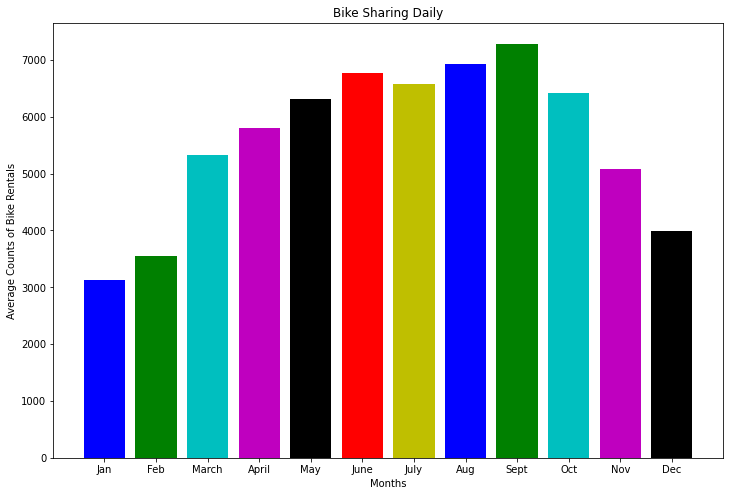

In [16]:
colors = ['b', 'g', 'c', 'm', 'k', 'r', 'y']
plt.figure(figsize = (12,8))
plt.bar(month_df['mnth'], month_df['cnt'], color = colors)

plt.title("Bike Sharing Daily")
plt.xlabel("Months")
plt.ylabel("Average Counts of Bike Rentals")

# September has higgest numbers of Bikes rented
# summer has very good number for bike rentals.

Text(0, 0.5, 'Total Counts of Bike Rentals')

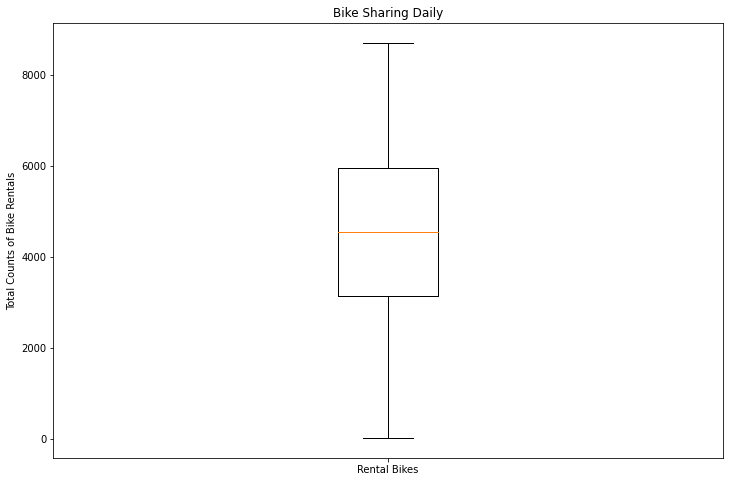

In [17]:
# Statistical distribution of count of bikes rented using Box plot.
# Summary statistics
plt.figure(figsize = (12,8))

plt.boxplot(bikesharing_data['cnt'])

plt.title("Bike Sharing Daily")
plt.xticks([1], ["Rental Bikes"])
plt.ylabel("Total Counts of Bike Rentals")

# No outliers in this data

In [18]:
selected_bike_data = bikesharing_data[['casual', 'registered']]
selected_bike_data.head()

,casual,registered
0,331,654
1,131,670
2,120,1229
3,108,1454
4,82,1518


In [20]:
columns = selected_bike_data.columns
columns

Index(['casual', 'registered'], dtype='object')

In [21]:
# Numpy array with 2 columns 
bike_data_array = selected_bike_data.values
bike_data_array

array([[ 331,  654],
       [ 131,  670],
       [ 120, 1229],
       ...,
       [ 159, 1182],
       [ 364, 1432],
       [ 439, 2290]])

Text(0, 0.5, 'Counts of Bike Rentals')

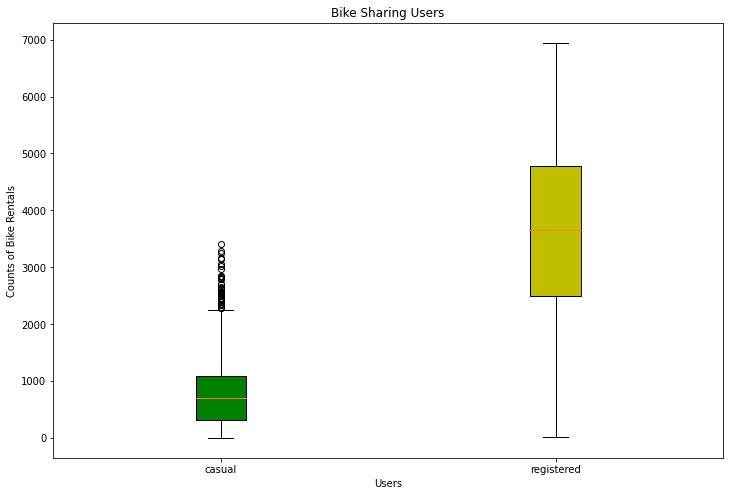

In [22]:
# 'patch_artist = True' will return a reference to the box plot patch which you can store in 'bp' variable.
# This reference can be used to customise the box plot
plt.figure(figsize = (12,8))

colors = ['g', 'y']
bp = plt.boxplot(bike_data_array, patch_artist=True, labels=columns)

for i in range(len(bp['boxes'])):
  bp['boxes'][i].set(facecolor=colors[i])

plt.title("Bike Sharing Users")
plt.xlabel("Users")
plt.ylabel("Counts of Bike Rentals")

# Green box - which represents Casual renters has many outliers. May be on a holiday there are many for casual renters who take bikes.
# no outlier point in registered users. 

Text(0, 0.5, 'Counts of Bike Rentals')

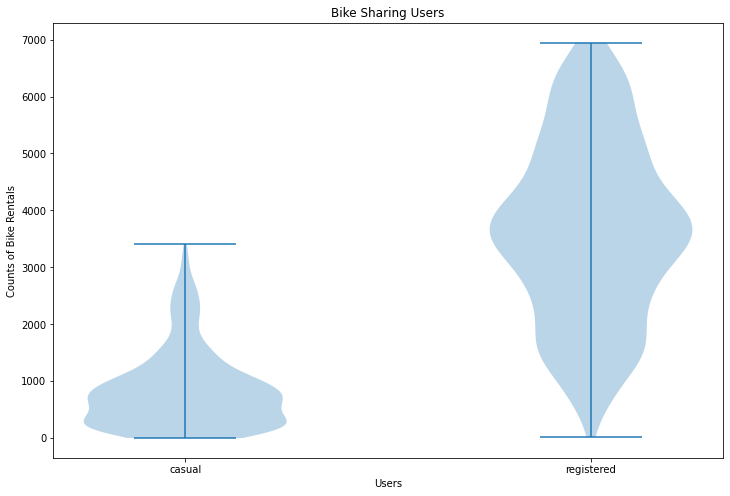

In [23]:
# Similar like box plot with additional detail.
# We can see probability density distribution curves along with the central vertical line
# KDE curve which shows how the data points are distributed.

plt.figure(figsize = (12,8))

vp = plt.violinplot(bike_data_array)

plt.xticks([1, 2], columns)
plt.title("Bike Sharing Users")
plt.xlabel("Users")
plt.ylabel("Counts of Bike Rentals")

In [24]:
season_data = bikesharing_data[['season', 'cnt']]
season_data.sample(5)
                               

,season,cnt
381,1,2935
263,3,4352
133,2,3409
543,3,7335
720,1,3623


In [25]:
# Total number of bikes rented per season
grouped_data_season = season_data.groupby('season', as_index=False).sum()
grouped_data_season.head()

,season,cnt
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


In [26]:
grouped_data_season['season'].replace([1,2,3,4], ['spring', 'summer', 'fall', 'winter'], inplace = True)
grouped_data_season
# Fall tends to be the most popular season among bike renters.  

,season,cnt
0,spring,471348
1,summer,918589
2,fall,1061129
3,winter,841613


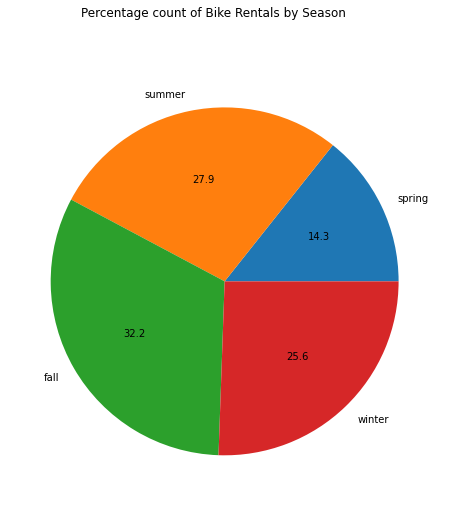

In [27]:
# Pie chart to view proportions in the data.
plt.figure(figsize = (12,8))
plt.pie(grouped_data_season['cnt'], labels=grouped_data_season['season'], autopct = '%.1f')

plt.suptitle('Percentage count of Bike Rentals by Season')

plt.show()

# Of all the bikes rented, 32.2% was rented in fall season.

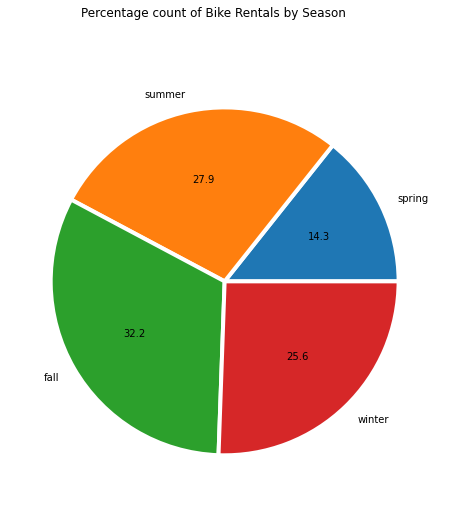

In [28]:
# Customizing pie chart
plt.figure(figsize = (12,8))
plt.pie(grouped_data_season['cnt'], labels=grouped_data_season['season'], autopct = '%.1f',
        wedgeprops = {'linewidth' : 4,
                      'edgecolor' : 'white'})

plt.suptitle('Percentage count of Bike Rentals by Season')

plt.show()

In [0]:
# Two tuples
explode_max = (0, 0, 0.2, 0)

explode_min = (0.2, 0, 0, 0)

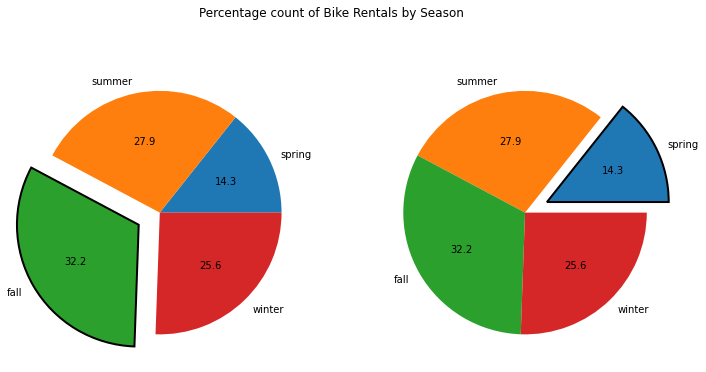

In [31]:
# To display 2 pie charts side by side with same data
# In first,  we explode out the largest section of the pie
# In second, we explode out the smallest section of the pie
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,6))

wedges, texts, autotexts = ax1.pie(grouped_data_season['cnt'], labels=grouped_data_season['season'], autopct = '%.1f', explode = explode_max)

wedges[2].set(edgecolor = 'k', linewidth = 2)

wedges, texts, autotexts = ax2.pie(grouped_data_season['cnt'], labels=grouped_data_season['season'], autopct = '%.1f', explode = explode_min)

wedges[0].set(edgecolor = 'k', linewidth = 2)

plt.suptitle('Percentage count of Bike Rentals by Season')

plt.show()